In [1]:
# import required modules
import csv
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

# read the data from csv data file
def read_data(filename):
    #perform a visual check on the data
    data = pd.read_csv(filename)
    print(data)
    with open(filename, 'r') as file:
        reader =csv.reader(file)
        next(reader) #skip the first row of headings
        data = list(reader)
    return [(float(row[0]), float(row[1])) for row in data]

print(read_data('knapsack.csv'))

    weights  values
0        21      96
1        12      99
2        30      52
3        24     100
4        45      46
..      ...     ...
95       47      93
96       28       6
97       24      53
98       25      12
99       16      39

[100 rows x 2 columns]
[(21.0, 96.0), (12.0, 99.0), (30.0, 52.0), (24.0, 100.0), (45.0, 46.0), (47.0, 43.0), (41.0, 22.0), (36.0, 20.0), (38.0, 84.0), (45.0, 73.0), (4.0, 53.0), (17.0, 83.0), (1.0, 52.0), (42.0, 56.0), (26.0, 22.0), (19.0, 59.0), (12.0, 15.0), (27.0, 6.0), (15.0, 69.0), (4.0, 61.0), (5.0, 22.0), (4.0, 41.0), (21.0, 63.0), (7.0, 56.0), (23.0, 13.0), (45.0, 17.0), (18.0, 1.0), (7.0, 42.0), (29.0, 49.0), (44.0, 16.0), (18.0, 67.0), (3.0, 2.0), (8.0, 12.0), (4.0, 96.0), (38.0, 98.0), (23.0, 4.0), (34.0, 50.0), (35.0, 87.0), (29.0, 25.0), (32.0, 84.0), (44.0, 82.0), (34.0, 63.0), (44.0, 1.0), (24.0, 38.0), (8.0, 91.0), (4.0, 69.0), (36.0, 38.0), (16.0, 64.0), (34.0, 25.0), (33.0, 58.0), (27.0, 99.0), (36.0, 85.0), (26.0, 29.0), (25.0, 69

In [2]:
#calculate the straight line distance between points using pythagoras
def strainghtLine_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5 

In [3]:
#calculate total distance of a given order of points
def total_distance(points, order):
    total = 0
    for i in range(len(order) - 1):
        point1 = points[order[i]]
        point2 = points[order[i + 1]]
        total += strainghtLine_distance(point1, point2)
    return total

In [4]:
# Calculate the acceptance probability based on the temperature and the difference in distances
def acceptance_probability(current_distance, new_distance, temperature):
    if new_distance < current_distance:
        return 1.0
    return math.exp((current_distance - new_distance) / temperature)

In [5]:
#Perform Simulated Annealing
def simulated_annealing_tsp(points, initial_order, temperature, cooling_rate):
    current_order = initial_order[:]
    best_order = current_order[:]
    best_distance = total_distance(points, current_order)

    while temperature > 0.1:
        # Generate a neighboring solution by swapping two points
        neighbor = current_order[:]
        index1 = random.randint(0, len(points) - 1)
        index2 = random.randint(0, len(points) - 1)
        neighbor[index1], neighbor[index2] = neighbor[index2], neighbor[index1]

        current_distance = total_distance(points, current_order)
        neighbor_distance = total_distance(points, neighbor)

        # Accept the neighboring solution if it improves the distance or by a probability
        if neighbor_distance < current_distance or random.random() < acceptance_probability(current_distance, neighbor_distance, temperature):
            current_order = neighbor[:]

        # Update the best solution if necessary
        if neighbor_distance < best_distance:
            best_order = neighbor[:]
            best_distance = neighbor_distance

        # Cool down the temperature
        temperature *= cooling_rate

    return best_order

In [6]:
# Run the algorithm multiple times and return the best orders
def run_algorithm(points, num_runs, initial_temperature, cooling_rate):
    best_orders = []
    for _ in range(num_runs):
        initial_order = list(range(len(points)))
        random.shuffle(initial_order)
        best_order = simulated_annealing_tsp(points, initial_order, initial_temperature, cooling_rate)
        best_orders.append(best_order)
    return best_orders

In [7]:
#Visualise results
def plot_tsp(points, order):
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    plt.plot(x, y, 'bo')
    # for i in range(len(order) - 1):
    #     start = order[i]
    #     end = order[i + 1]
    #     plt.plot([points[start][0], points[end][0]], [points[start][1], points[end][1]], 'r-')
    # plt.plot([points[order[-1]][0], points[order[0]][0]], [points[order[-1]][1], points[order[0]][1]], 'r-')

    weights  values
0        21      96
1        12      99
2        30      52
3        24     100
4        45      46
..      ...     ...
95       47      93
96       28       6
97       24      53
98       25      12
99       16      39

[100 rows x 2 columns]
Run 1: Distance = 3566.3259247364786
Run 2: Distance = 3562.476790727013
Run 3: Distance = 3701.4187946996626
Run 4: Distance = 3683.6589255870867
Run 5: Distance = 3230.510312064341
Run 6: Distance = 3440.2926312146983
Run 7: Distance = 3521.887144710634
Run 8: Distance = 3452.1313466973675
Run 9: Distance = 3261.309107402303
Run 10: Distance = 3603.926456245449


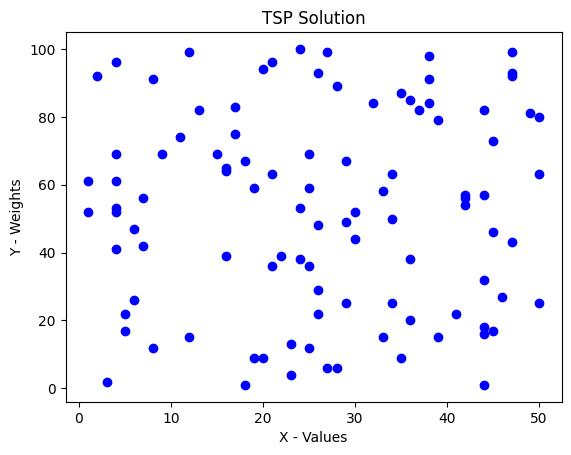

In [10]:
if __name__ == '__main__':
    # Define the input filename, number of runs, initial temperature, and cooling rate
    filename = 'knapsack.csv'
    num_runs = 10
    initial_temperature = 200.0
    cooling_rate = 0.85

    # Read the data from the file
    points = read_data(filename)

    # Run the algorithm and get the best orders
    best_orders = run_algorithm(points, num_runs, initial_temperature, cooling_rate)

    # Print the results for each run
    for i, order in enumerate(best_orders):
        distance = total_distance(points, order)
        print(f'Run {i + 1}: Distance = {distance}')

    # Plot the best TSP solution
    best_order = best_orders[0]  # Assume the first order is the best
    plot_tsp(points, best_order)
    plt.xlabel('X - Values')
    plt.ylabel('Y - Weights')
    plt.title('TSP Solution')
    plt.show()